In [53]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import torchvision

In [54]:
dataset = torchvision.datasets.MNIST('./data', train=True, download=True)

train_set = torch.utils.data.Subset(dataset, torch.arange(0,45000))
validation_set = torch.utils.data.Subset(dataset, torch.arange(45000,50000))
test_set = torch.utils.data.Subset(dataset, torch.arange(50000,len(dataset)))

bsize = 64

train_dataloader = data_utils.DataLoader(train_set, batch_size = bsize, sampler=data_utils.RandomSampler)
validation_set = data_utils.DataLoader(validation_set, batch_size = bsize, sampler=data_utils.RandomSampler)
test_set = data_utils.DataLoader(test_set, batch_size = bsize, sampler=data_utils.SequentialSampler)

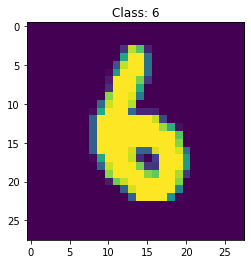

In [55]:
sample_img, img_class = dataset[np.random.randint(len(dataset))]

plt.imshow(sample_img)
plt.title(f"Class: {img_class}")
plt.show()

In [47]:
class MnistNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.transform = torchvision.transforms.Compose([
            torchvision.transforms.PILToTensor(),
            torchvision.transforms.ConvertImageDtype(torch.float32),
            torchvision.transforms.Normalize(mean=1, std=0.5),
        ])

        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 10)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, img_in):

        transformed_img = self.transform(img_in).view(1,-1)
        out = self.linear1(transformed_img)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        out = self.softmax(out)

        return out


In [50]:
model = MnistNN()
loss_fn = nn.CrossEntropyLoss()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

lr = 1e-4
optimizer = torch.optim.RMSProp(model.params, lr=lr, alpha=0.9)

EPOCH_NUM = 10

for epoch in EPOCH_NUM:
    for idx, (img, label) in train_dataloader:
        logits = model(img)
        loss = loss_fn(logits, label)

AttributeError: ignored